# Salary Prediction on the basis of years of Experience 
## Implementation of linear regression in python without scikit learn library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.shape

(30, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

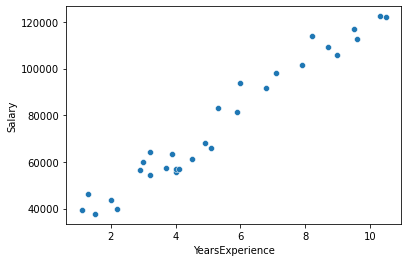

In [6]:
sns.scatterplot(data=data, x='YearsExperience', y='Salary')

# Gradient Descent 

In [7]:
X= np.array(data['YearsExperience'])
Y = np.array(data['Salary'])

In [8]:
m,c =0,0
L = 0.0001
epochs = 1000
n = float(len(X))
n

30.0

In [9]:
for i in range(epochs):
        y_pred = m*X+c  # current predicted value of y
        D_m =(-2/n)*sum(X*(Y-y_pred)) # Derivative w.r.t slope m
        D_c = (-2/n)*sum(Y - y_pred)  # Derivative w.r.t intercept c
        m = m-L*D_m   # updated m
        c = c-L*D_c   # updated c
print(m,c)

12836.600965885045 2915.2044856014018


In [10]:
y_pred = m*X+c
y_pred

array([ 17035.46554807,  19602.78574125,  22170.10593443,  28588.40641737,
        31155.72661055,  40141.34728667,  41425.00738326,  43992.32757643,
        43992.32757643,  50410.62805938,  52977.94825255,  54261.60834914,
        54261.60834914,  55545.26844573,  60679.90883208,  65814.54921844,
        68381.86941162,  70949.18960479,  78651.15018432,  79934.81028091,
        90204.09105362,  94055.07134339, 104324.35211609, 108175.33240586,
       114593.6328888 , 118444.61317857, 124862.91366151, 126146.5737581 ,
       135132.19443422, 137699.51462739])

In [11]:
X

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

In [12]:
min(X), max(X)

(1.1, 10.5)

In [13]:
min(y_pred), max(y_pred)

(17035.465548074953, 137699.51462739438)

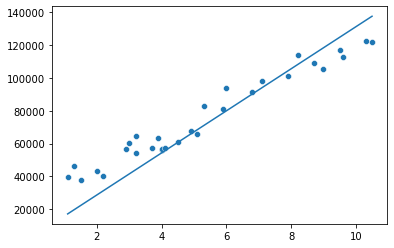

In [14]:
sns.scatterplot(data=data, x=X, y=Y)
plt.plot([min(X),max(X)],[min(y_pred),max(y_pred)])

In [15]:
rs = m*2+c   # X is input feature change value of X and predict y
rs

28588.406417371494

# Linear Least Square 

In [16]:
beta1 = np.cov(X,Y)   # find covariance to get beta1 (slope)
beta1 = beta1[0,1]/beta1[0,0]  # taking [0,0] loc of covariance matrix  for variance and [0,1] for covariance  
beta1

9449.962321455077

In [17]:
beta0 = np.mean(Y)-beta1*np.mean(X)  # beta0 (intercept value)
beta0 

25792.20019866869

In [18]:
ypol = beta1*X +beta0  #predicted values of y


<AxesSubplot:>

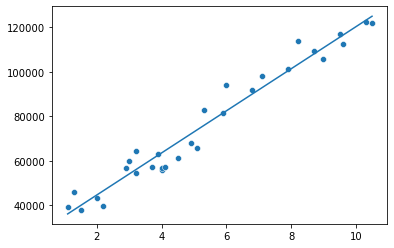

In [19]:
sns.scatterplot(data=data, x=X, y=Y)
sns.lineplot(x=X, y=ypol)

In [20]:
x_i = 2
rs2 = beta1*x_i + beta0
rs2

44692.12484157884

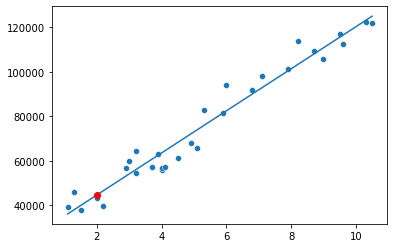

In [21]:
sns.scatterplot(data= data,x=X,y=Y)
sns.lineplot(x=X, y=ypol,)
plt.plot(x_i, rs2, marker ="o",color='red')

# Linear Regression using OOP Concepts

In [22]:
# Defining class
class LinearRegression:
    def __init__(self,inputFeature,outputFeature):
        self.inputFeature = inputFeature
        self.outputFeature = outputFeature
        
    def printGDmc(self):
        m,c =0,0
        L = 0.0001
        epochs = 1000
        n = float(len(self.inputFeature))
        for i in range(epochs):
            y_pred = m*self.inputFeature+c  # current predicted value of y
            D_m =(-2/n)*sum(self.inputFeature*(self.outputFeature-y_pred)) # Derivative w.r.t slope m
            D_c = (-2/n)*sum(self.outputFeature - y_pred)  # Derivative w.r.t intercept c
            m = m-L*D_m   # updated m
            c = c-L*D_c   # updated c
        return m,c
        
    def printLSmc(self):
        beta1 = np.cov(self.inputFeature,self.outputFeature)   # find covariance to get beta1 (slope)
        beta1 = beta1[0,1]/beta1[0,0]  # taking [0,0] loc of covariance matrix  for variance and [0,1] for covariance
        beta0 = np.mean(self.outputFeature)-beta1*np.mean(self.inputFeature)  # beta0 (intercept value)
        return beta1,beta0
    
    def compareGDnLS(self,mGD,cGD,mLS,cLS):
        y_predGD = mGD*self.inputFeature+cGD
        y_predLS = mLS*self.inputFeature +cLS
        sns.scatterplot(self.inputFeature,self.outputFeature);
        plt.plot([min(self.inputFeature),max(self.inputFeature)],[min(y_predGD),max(y_predGD)], color='r');
        plt.plot([min(self.inputFeature),max(self.inputFeature)],[min(y_predLS),max(y_predLS)], color='g');
        
    def userOutput(self,years):
        gdOut=self.printGDmc()
        #print(gdOut[0])
        resultGD = gdOut[0]*years+gdOut[1]
        #print(resultGD)
        lsOut=self.printLSmc()
        resultLS = lsOut[0]*years+lsOut[1]
        return resultGD, resultLS
    
    def mse(self):
        gdOut=self.printGDmc()
        predGD = gdOut[0]*self.inputFeature+gdOut[1]
        lsOut=self.printLSmc()
        predLS=lsOut[0]*self.inputFeature+lsOut[1]
        differenceGD = predGD-self.outputFeature
        sqGD = np.square(differenceGD)
        



## Feature and Target Column

In [23]:
salaryPrediction = LinearRegression(X,Y)
print("Input Features: ",salaryPrediction.inputFeature)
print("Output Features: ",salaryPrediction.outputFeature)

Input Features:  [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]
Output Features:  [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


## Slope and intercept using gradient descent

In [24]:
salaryPrediction.printGDmc()

(12836.600965885045, 2915.2044856014018)

## Slope and intercept using Loss function

In [25]:
salaryPrediction.printLSmc()

(9449.962321455077, 25792.20019866869)

C:\Users\Home\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


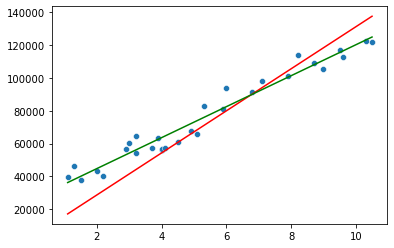

In [26]:
gd = salaryPrediction.printGDmc()
ls = salaryPrediction.printLSmc()
salaryPrediction.compareGDnLS(gd[0],gd[1],ls[0],ls[1])

## User Input

In [27]:
inputYearsofExp = float(input("Enter your years of experience: "))
result = salaryPrediction.userOutput(inputYearsofExp)
print("Predicted value using Gradient Descent: ",result[0])
print("Predicted value using Least Square: ",result[1])

Enter your years of experience: 3
Predicted value using Gradient Descent:  41425.00738325654
Predicted value using Least Square:  54142.087163033924


## MSE